# Intro
---

<b> Github del proyecto : </b> [computer-vision-cards](https://github.com/amaranto/computer-vision-cards.git)
<p><b> Drive: </b> <a href="https://drive.google.com/drive/folders/1ddGMw-1mH15e0dYKH11aR1zAGSCUNSZE">tp final ds</a> </p>
<p><b> Alumno : </b> Ezequiel Arevalo </p>
<p><b> Materia: </b> Computer Vision </p>
<p><b> Carrera: </b> TUIA </p>

# Ejemplo de Inferencia

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
! pip install ultralytics

In [48]:
import os
import shutil
import json
from ultralytics import YOLO

In [ ]:
!( [ -d computer-vision-cards ] && cd computer-vision-cards/ && git pull origin main ) || git clone https://github.com/amaranto/computer-vision-cards.git

## Ajustes Iniciales

In [52]:
student_name = "arevalo_ezequiel"

model_path = "models/best.pt"

imgs_dir = "data/eval/images/val"
base_dir = "data/out"
# imgs_dir = "/content/drive/MyDrive/TUIA/CV/2024-01_practico/data/eval/images/val"
# base_dir = "/content/drive/MyDrive/TUIA/CV/2024-01_practico/data/out"

dets_dir = os.path.join(base_dir, student_name)

In [78]:
# Reestablecimiento del directorio de destino (eliminacion)
if os.path.exists(dets_dir):
    shutil.rmtree(dets_dir)

os.makedirs(dets_dir)

## Inferencia

### Formato YOLOv5 para las salidas de las inferencias

Estas son las celdas para que el estudiante complete con su código de inferencia.

Debe generar un archivo con las detecciones en formato YOLOv5, donde cada línea contiene:
 cls, xc, yx, w, h, c

* **cls**: número de índice de la clase

* **xc**: coordenada x al centro de la caja delimitadora (bbox)

* **yx**: coordenada y al centro de la caja delimitadora (bbox)

* **w**: ancho de la caja delimitadora

* **h**: alto de la caja delimitadora

* **c**: certeza del modelo sobre la clasificacíon (confidence)


 Todas las coordenadas deben ser relativas: [0 ... 1]

NOTA: Si utiliza un modelo YoloV8 de ultralytics, pueder llamar al método result.save_txt(file_name, save_conf=True)

### Formato para los archivos de envido.json

Además de las detecciones anteriores, debe existir un archivo llamado envido.json con la siguiente estructura:

```json
{
    "IMG_20240630_174514649_HDR.jpg": {
        "total_cards": 3,
        "cards": {
            "E": [],
            "C": [
                12
            ],
            "B": [
                11
            ],
            "O": [
                10
            ]
        },
        "points": 0,
        "figure": "N/A"
    },
    "IMG_20240630_173918579.jpg": {
        "total_cards": 2,
        "cards": {
            "E": [],
            "C": [],
            "B": [],
            "O": [
                9,
                8
            ]
        },
        "points": 0,
        "figure": "N/A"
    },
  ...
}
```

Esto indica que hay un total de tres cartas, que son el 5 y el 1 de Copas, y el 2 de Basto, que dan 26 puntos de envido de Copa.

Este archivo debe contener una clave con el nombre de archivo, donde cada elemento es a su vez un objeto cons las claves detalladas.

Revise el archivo gt_envido.json para analizar todas las posibilidades.

### DEMO: cálculo del envido

A continuación hay una implementación del cálculo de los puntos a modo de ejemplo, que sirve de referencia para evaluar el algoritmo de evaluación.

**ESTA ES LA SECCIÓN QUE CADA ALUMNO REEMPLAZARIA CON SU CODIGO**

### Google colab
---
<p>Para poder ejecutar de manera automatica desde colab correr el siguiente bloque de codigo</p>

In [55]:
! mkdir -p /content/datasets/ && mkdir -p /content/models/
! cp computer-vision-cards/models/best.pt /content/models/
! cp -r computer-vision-cards/datasets /content/datasets/
! cp -r computer-vision-cards/data /content/datasets/
! cp -r computer-vision-cards/data/eval /content/data/eval

mkdir: cannot create directory ‘/content’: Permission denied


cp: cannot stat 'computer-vision-cards/models/best.pt': No such file or directory
cp: cannot stat 'computer-vision-cards/datasets': No such file or directory
cp: cannot stat 'computer-vision-cards/data': No such file or directory


In [57]:
import glob
import torch
import os

os.makedirs("./predictions", exist_ok=True)

#if __name__=='__main__':
device = 'cuda' if torch.cuda.is_available() else 'cpu'
model = YOLO(model_path)
results = model.val(data="data/eval/dataset.yaml")
#results = model.val(data=YOLO_DATASET)

Ultralytics YOLOv8.2.62 🚀 Python-3.11.2 torch-2.3.1+cu121 CUDA:0 (Tesla T4, 14918MiB)


YOLOv8m summary (fused): 218 layers, 25,869,289 parameters, 0 gradients, 78.8 GFLOPs


val: Scanning /home/earevalo/computer-vision-cards/data/eval/labels/val.cache... 32 images, 0 backgrounds, 0 corrupt: 100%|██████████| 32/32 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:04<00:00,  2.32s/it]


                   all         32         65      0.708      0.772       0.85      0.578
                    1O          2          2      0.826          1      0.995       0.51
                    1C          2          2      0.812          1      0.995      0.553
                    1E          1          1      0.703          1      0.995      0.995
                    1B          1          1      0.677          1      0.995      0.697
                    2O          1          1      0.702          1      0.995      0.796
                    2C          1          1      0.886          1      0.995      0.697
                    2B          2          2      0.806          1      0.995       0.69
                    3O          1          1      0.683          1      0.995      0.895
                    3C          1          1      0.673          1      0.995      0.398
                    3E          2          2      0.825          1      0.995      0.827
                    3

# Predicciones
---

<p>Vemos que se cumple lo esperado planteado en el analisis de metrica al entrenar al modelo, las metricas de evaluacion muestran fallos al predecir algunas cartas, si bien la deteccion de los bounding boxes es muy buena y la gran mayoria de las cartas fueron predecidas perfectamente el modelo no es 100% efectivo a la hora de predecir el dataset provisto por los profesores.</p>

# Calculo del envido
---



In [97]:
import glob
import matplotlib.pyplot as plt 

pictures = glob.glob(f"{imgs_dir}/*")

inference_result = []
card_ds_file = {}

r_id=0
for picture in pictures:
    filename = os.path.basename(picture)
    basename = filename.split(".")[0]

    results = model.predict(picture)  
    for result in   results:
        boxes = result.boxes
        masks = result.masks
        keypoints = result.keypoints
        probs = result.probs
        obb = result.obb
        
        mano = {
            "points": 0,
            "figure": "N/A",
            "total_cards": 0,
            "cards": {
                "E":[], 
                "C":[],
                "B":[], 
                "O":[]
            }
        }
        
        if len(results) < 1 or len(results) > 3:
            print(f"Se detectaron {len(results)} cartas y se necesitan desde 1 a 3 cartas para cantar envido")
        
        mano["total_cards"] = len(results)
        
        for cartas in results:
            
            cartas.save(filename=f"./predictions/{filename}")
            cartas.save_txt(f"{dets_dir}/{basename}.txt", save_conf=True)
            
            for carta in cartas:
                id_carta = carta.boxes.cls
                carta = carta.names[int(id_carta)]

                if carta[0] in ["8","9","J","S"]:
                    print(f"{carta} no es una carta valida para jugar al truco.")
                    continue
                
                n_carta = carta[:-1]
                p_carta = carta[-1]
                mano["cards"][p_carta].append(n_carta)
                
        for palo, nums in mano["cards"].items():
            p_points = 0
            nums = [ int(n) if not n in ["10","11","12"] else 0 for n in nums ]
            nums = sorted(nums,reverse=True)
            nums = nums[:2]
            p_points = 20 if len(nums) > 1 else 0
            
            for num in nums:
                p_points += num

            mano["figure"] = mano["figure"] if p_points <= mano["points"] else palo
            mano["points"] = mano["points"] if p_points <= mano["points"] else p_points
        card_ds_file[filename] = mano
    inference_result.append(results)



image 1/1 /home/earevalo/computer-vision-cards/data/eval/images/val/IMG_20240630_174115784.jpg: 640x512 1 8C, 1 9C, 1 9E, 27.7ms
Speed: 3.6ms preprocess, 27.7ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 512)


9E no es una carta valida para jugar al truco.
9C no es una carta valida para jugar al truco.
8C no es una carta valida para jugar al truco.

image 1/1 /home/earevalo/computer-vision-cards/data/eval/images/val/IMG_20240630_174005265.jpg: 640x512 1 1O, 27.6ms
Speed: 3.4ms preprocess, 27.6ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 512)

image 1/1 /home/earevalo/computer-vision-cards/data/eval/images/val/IMG_20240630_174133804_HDR.jpg: 640x512 1 3E, 1 4E, 27.6ms
Speed: 3.2ms preprocess, 27.6ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 512)

image 1/1 /home/earevalo/computer-vision-cards/data/eval/images/val/IMG_20240630_174302382_HDR.jpg: 640x512 1 1E, 1 6C, 27.6ms
Speed: 3.2ms preprocess, 27.6ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 512)

image 1/1 /home/earevalo/computer-vision-cards/data/eval/images/val/IMG_20240630_173954348.jpg: 640x512 1 1O, 1 12C, 27.6ms
Speed: 3.5ms preprocess, 27.6ms inference, 1.3ms postprocess per imag

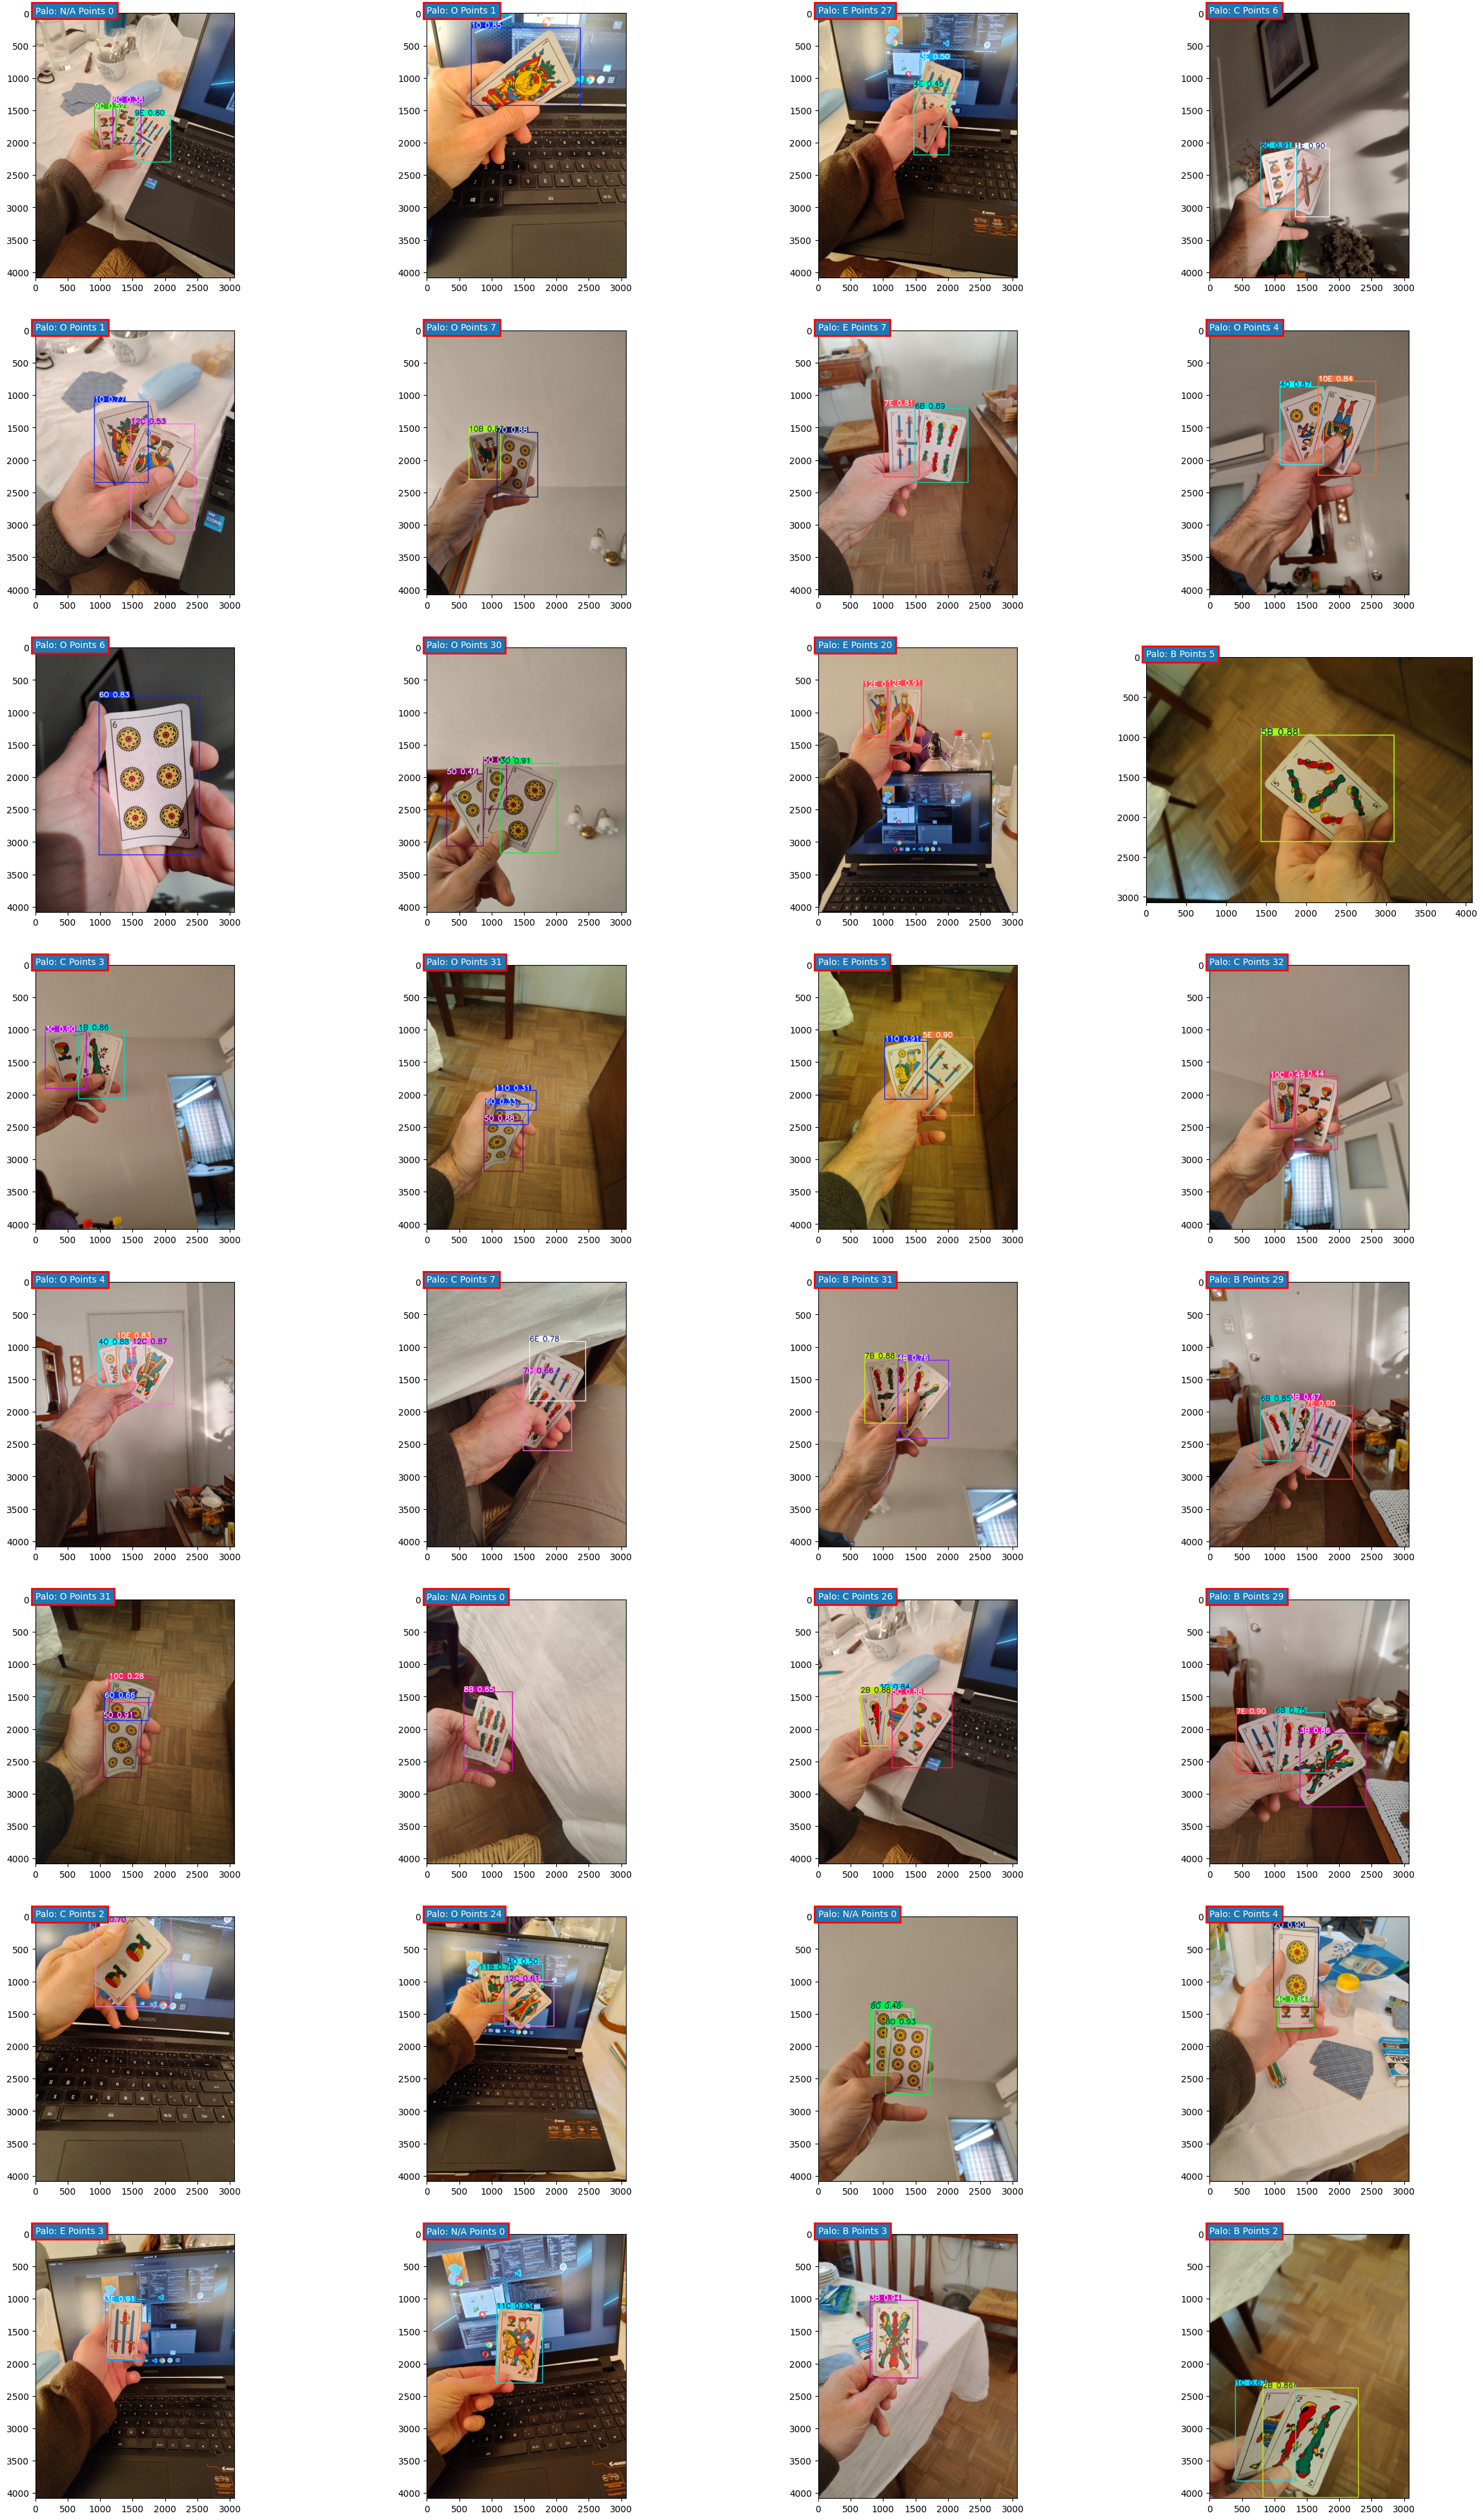

In [102]:
import glob
import matplotlib.pyplot as plt 

cols = 4
rows = (len(card_ds_file)/cols) + (len(card_ds_file)%cols)
rows = int(rows)
fig, axs = plt.subplots(ncols=cols, nrows=rows, figsize=(30.0, 50.0), sharex=False, sharey=False)

n=0
pics = glob.glob(f"{imgs_dir}/*")
for i in range(0,rows):
    for j in range(0,cols):
        if n >= len(pics):
            break
        pic = pics[n]
        pic = os.path.basename(pic)
        
        if not pic in card_ds_file:
            n+=1
            continue
        
        pic_path = f"./predictions/{pic}"
        dist_labels = plt.imread(pic_path)
        axs[i][j].imshow(dist_labels)
        axs[i][j].text(0,0, f"Palo: {card_ds_file[pic]['figure']} Points {card_ds_file[pic]['points']}", color="white",bbox=dict(fill=True, edgecolor='red', linewidth=2))
        n+=1
        
plt.show()

## Escritura del archivo envido.json

In [103]:
with open(os.path.join(dets_dir, "envido.json"), "w") as jf:
    json.dump(card_ds_file, jf, indent=4)